#                    The Titanic dataset survival prediction
#                    Neural Network and Multiple Linear Regression

rejected attributes :  

PassengerId, 
Ticket, 
Cabin.

attributes used :

Pclass, 
Name, 
Sex, 
Age, 
SibSp, 
Parch, 
Fare, 
Embarked, 
Survived


##                                                       attribute analysis


In [403]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
train = pd.read_csv('/Users/nic/Desktop/train.csv', header = 0)

###                                                                    1 Pclass vs Survived


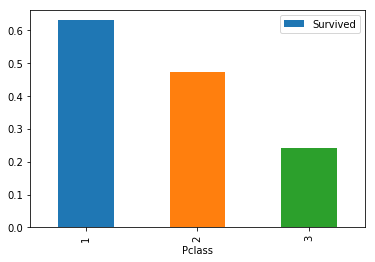

In [352]:
graph1 = train[['Pclass','Survived']]
graph1 = graph1.groupby(['Pclass'], as_index='False').mean().reset_index()
graph1.plot(x='Pclass', y='Survived', kind = 'bar')

so you can see the trend of survival : passenger class 1 > class 3 > class 2

###                                                                           2 Name vs Survived


#####     name attribute is compound attribute with three parts. i.e. title, first name and last name. trying to extract some information from the title as follows. i will find out what is the prior probability given dataset that a person with given title will survive. i will use these values as weights for all the titles to convert them to a metric value from nominal.

probability of survival given a title
       Title  Survived
0       Capt  0.000000
1        Col  0.500000
2   Countess  1.000000
3        Don  0.000000
4         Dr  0.428571
5   Jonkheer  0.000000
6       Lady  1.000000
7      Major  0.500000
8     Master  0.575000
9       Miss  0.702703
10        Mr  0.156673
11       Mrs  0.793651
12       Rev  0.000000
13       Sir  1.000000


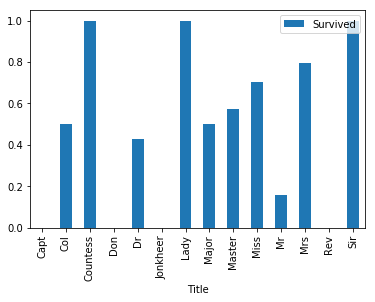

In [353]:
import re as re
graph2 = train[['Name','Survived']]


def get_title(name):
	title = re.search('([A-Za-z]+)\.', name)
	if title:
		return title.group(1)
	return ""

new = []
remap = {'Mlle':'Miss', 'Ms':'Miss','Mme': 'Mrs' }         #remapping some titles

for i,row in graph2.iterrows():
    x = get_title(graph2['Name'][i])
    new.append([x,graph2['Survived'][i]])
    
df = pd.DataFrame(new,columns=['Title','Survived'])
df = df.replace({"Title":remap})


# print("all per title")
# graph2 = df.groupby(['Title'], as_index='False').count().reset_index()
# print(graph2)
# print("survived")
# graph2 = df.groupby(['Title'], as_index='False').sum().reset_index()
# print(graph2)
print("probability of survival given a title")
graph2 = df.groupby(['Title'], as_index='False').mean().reset_index()
print(graph2)
graph2.plot(x='Title', kind = 'bar')


###                                                                           3 Sex vs Survived

####      weight male = chance of male surviving
####      weight female = chance of female surviving
####      clearly more females survived :O

probability of survival given a gender
      Sex  Survived
0  female  0.742038
1    male  0.188908


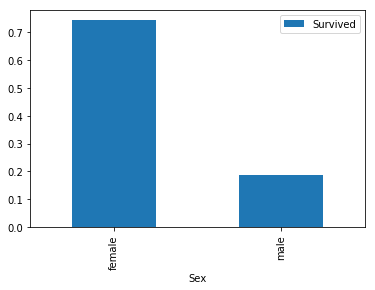

In [354]:
graph3 = train[['Sex','Survived']]

print("probability of survival given a gender")
# graphx = graph3.groupby(['Sex'], as_index='False').count().reset_index()
# print(graphx)
# graphy = graph3.groupby(['Sex'], as_index='False').sum().reset_index()
# print(graphy)
graph3 = graph3.groupby(['Sex'], as_index='False').mean().reset_index()
print(graph3)
graph3.plot(x='Sex', kind = 'bar')

###                                                                           4 Embarked vs Survived



probability of survival given a title
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


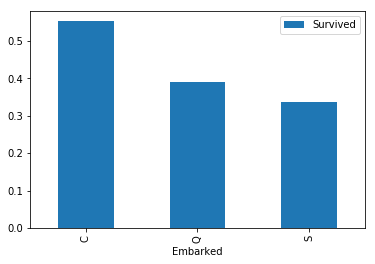

In [355]:
graph4 = train[['Embarked','Survived']]
  
print("probability of survival given a title")
graph4 = graph4.groupby(['Embarked'], as_index='False').mean().reset_index()
print(graph4)
graph4.plot(x='Embarked', kind = 'bar')



###                                                                          5 SibSp and Parch
#### i will either replace the number of relations with probability weights or keep them as it is because values are already numeric.

probability of survival given number of relations
   Relation  Survived
0         0  0.303538
1         1  0.552795
2         2  0.578431
3         3  0.724138
4         4  0.200000
5         5  0.136364
6         6  0.333333
7         7  0.000000
8        10  0.000000


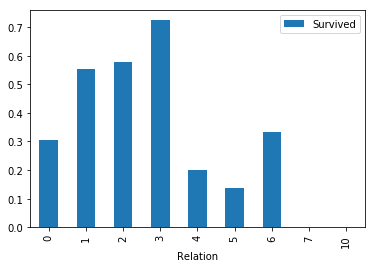

In [356]:
graph5 = train[['SibSp','Parch','Survived']]
  
#print(graph5.describe())
new = []

for i,row in graph5.iterrows():
    x = graph5['SibSp'][i]
    y = graph5['Parch'][i]
    new.append([int(x+y),graph5['Survived'][i]])
    
graph5 = pd.DataFrame(new,columns=['Relation','Survived'])
#print(graph5)
print("probability of survival given number of relations")
graph5 = graph5.groupby(['Relation'], as_index='False').mean().reset_index()
print(graph5)
graph5.plot(x='Relation', kind = 'bar')

#                                            filling missing values

In [388]:
train['Embarked'].isnull().sum().sum()

2

In [391]:
train.fillna(train['Embarked'].value_counts().index[0], inplace=True)
train['Embarked'].isnull().sum().sum()

0

In [389]:
train['Age'].isnull().sum().sum()

177

In [390]:
train.fillna(train.mean()['Age'], inplace=True)
train['Age'].isnull().sum().sum()

0

now we dont have missing values.
also as we didnt manipulate age olumn above, its okay to fill values now. and since embarked has just 2 missing values and its a nominal data, i replaced them with most occouring values.

#                                    mapping all nominal data to weights

In [392]:
d1=[]
d2=[]
d3=[]
d4=[]
d5=[]
for columns in graph1.to_dict():
    value = graph1.to_dict().get(columns)
    d1.append(list(value.values()))
for columns in graph2.to_dict():
    value = graph2.to_dict().get(columns)
    d2.append(list(value.values()))
for columns in graph3.to_dict():
    value = graph3.to_dict().get(columns)
    d3.append(list(value.values()))
for columns in graph4.to_dict():
    value = graph4.to_dict().get(columns)
    d4.append(list(value.values()))
for columns in graph5.to_dict():
    value = graph5.to_dict().get(columns)
    d5.append(list(value.values()))

d1=dict(zip(d1[0],d1[1]))
d2=dict(zip(d2[0],d2[1]))
d3=dict(zip(d3[0],d3[1]))
d4=dict(zip(d4[0],d4[1]))
d5=dict(zip(d5[0],d5[1]))

print(d1)
print()
print(d2)
print()
print(d3)
print()
print(d4)
print()
print(d5)




{1: 0.6296296296296297, 2: 0.47282608695652173, 3: 0.24236252545824846}

{'Capt': 0.0, 'Col': 0.5, 'Countess': 1.0, 'Don': 0.0, 'Dr': 0.42857142857142855, 'Jonkheer': 0.0, 'Lady': 1.0, 'Major': 0.5, 'Master': 0.575, 'Miss': 0.7027027027027027, 'Mr': 0.15667311411992263, 'Mrs': 0.7936507936507936, 'Rev': 0.0, 'Sir': 1.0}

{'female': 0.7420382165605095, 'male': 0.18890814558058924}

{'C': 0.5535714285714286, 'Q': 0.38961038961038963, 'S': 0.33695652173913043}

{0: 0.30353817504655495, 1: 0.5527950310559007, 2: 0.5784313725490197, 3: 0.7241379310344828, 4: 0.2, 5: 0.13636363636363635, 6: 0.3333333333333333, 7: 0.0, 10: 0.0}


In [393]:
trainnew = train

new = []

for i,row in trainnew.iterrows():
    x = get_title(trainnew['Name'][i])
    new.append([x,trainnew['Survived'][i],trainnew['Pclass'][i],trainnew['Sex'][i],trainnew['Age'][i],int(trainnew['SibSp'][i]+trainnew['Parch'][i]),trainnew['Fare'][i],trainnew['Embarked'][i]])
    
trainnew = pd.DataFrame(new,columns=['Title','Survived','Pclass','Sex','Age','Relation','Fare','Embarked'])
trainnew = trainnew.replace({"Title":remap})

print(trainnew.head(20))

     Title  Survived  Pclass     Sex        Age  Relation     Fare Embarked
0       Mr         0       3    male  22.000000         1   7.2500        S
1      Mrs         1       1  female  38.000000         1  71.2833        C
2     Miss         1       3  female  26.000000         0   7.9250        S
3      Mrs         1       1  female  35.000000         1  53.1000        S
4       Mr         0       3    male  35.000000         0   8.0500        S
5       Mr         0       3    male  29.699118         0   8.4583        Q
6       Mr         0       1    male  54.000000         0  51.8625        S
7   Master         0       3    male   2.000000         4  21.0750        S
8      Mrs         1       3  female  27.000000         2  11.1333        S
9      Mrs         1       2  female  14.000000         1  30.0708        C
10    Miss         1       3  female   4.000000         2  16.7000        S
11    Miss         1       1  female  58.000000         0  26.5500        S
12      Mr  

In [394]:
#now mapping values to probability stuff

trainnew = trainnew.replace({"Pclass":d1})
trainnew = trainnew.replace({"Title":d2})
trainnew = trainnew.replace({"Sex":d3})
trainnew.Relation = trainnew.Relation.map(d5)
trainnew = trainnew.replace({"Embarked":d4})

print(trainnew.head(20))



       Title  Survived    Pclass       Sex        Age  Relation     Fare  \
0   0.156673         0  0.242363  0.188908  22.000000  0.552795   7.2500   
1   0.793651         1  0.629630  0.742038  38.000000  0.552795  71.2833   
2   0.702703         1  0.242363  0.742038  26.000000  0.303538   7.9250   
3   0.793651         1  0.629630  0.742038  35.000000  0.552795  53.1000   
4   0.156673         0  0.242363  0.188908  35.000000  0.303538   8.0500   
5   0.156673         0  0.242363  0.188908  29.699118  0.303538   8.4583   
6   0.156673         0  0.629630  0.188908  54.000000  0.303538  51.8625   
7   0.575000         0  0.242363  0.188908   2.000000  0.200000  21.0750   
8   0.793651         1  0.242363  0.742038  27.000000  0.578431  11.1333   
9   0.793651         1  0.472826  0.742038  14.000000  0.552795  30.0708   
10  0.702703         1  0.242363  0.742038   4.000000  0.578431  16.7000   
11  0.702703         1  0.629630  0.742038  58.000000  0.303538  26.5500   
12  0.156673

## this is the new dataset we want to play with i guess. lets pass it via NN.

### ill start by splitting it into two for training and testing.

# Neural Network :

In [545]:
X = trainnew.drop('Survived',axis=1)
Y = trainnew['Survived']

In [546]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,),max_iter=500)
mlp.fit(X_train,Y_train)
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

[[125  13]
 [ 28  57]]
             precision    recall  f1-score   support

          0       0.82      0.91      0.86       138
          1       0.81      0.67      0.74        85

avg / total       0.82      0.82      0.81       223



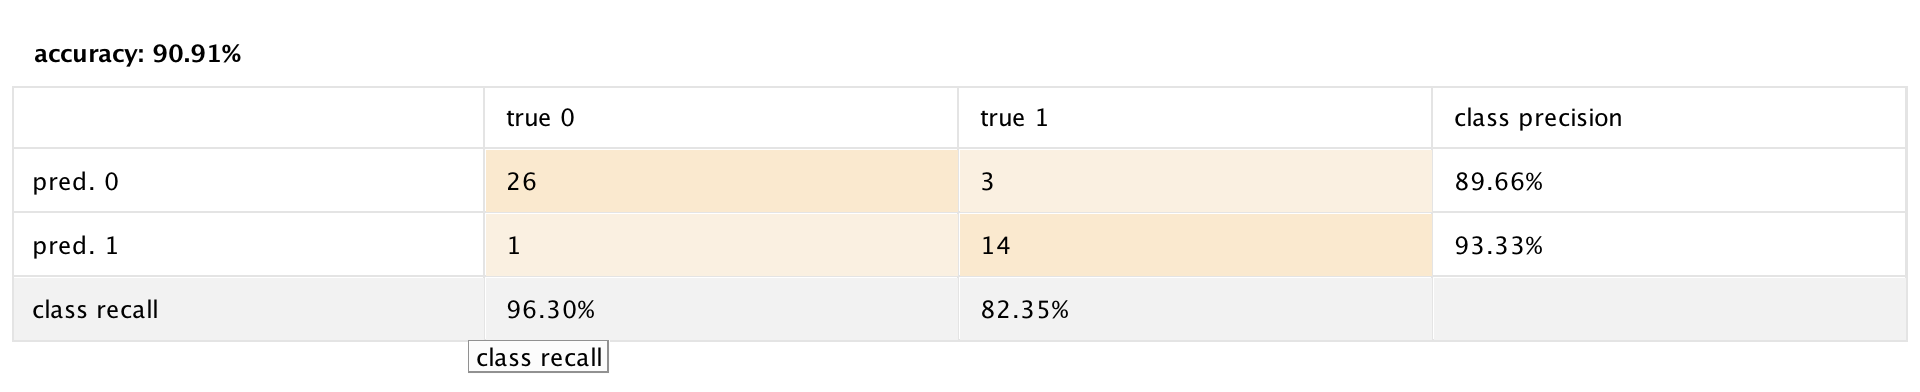

In [547]:
from IPython.display import Image
Image(filename='/Users/nic/Desktop/some.png')
#this is the accuracy of the modified dataset pssed into neuralnetwork operator in rapid miner pro software. only suggests that with appropiate optimization the model can achive better results.

# multivariable linear regression :

In [548]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [549]:
print(regressor.coef_)

[ 8.01978328e-01  7.22956816e-01  9.28774790e-02 -2.98289847e-03
  2.77900179e-01  8.08411062e-05  7.23298265e-03]


In [550]:
Y_pred = regressor.predict(X_test) 

In [551]:
dfinal = pd.DataFrame({'Actual': Y_test, 'Predicted': np.rint(Y_pred)})  

In [552]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))) 

Mean Absolute Error: 0.2688536188926019
Mean Squared Error: 0.12651638572241541
Root Mean Squared Error: 0.35569141924203823


In [553]:
dfinal

,Actual,Predicted
495,0,0.0
648,0,0.0
278,0,0.0
31,1,1.0
255,1,1.0
298,1,0.0
609,1,1.0
318,1,1.0
484,1,0.0
367,1,1.0


#              name : shriyans kapoor 
#              mail : facinick@gmail.com

# State Vector Machine :

In [554]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, Y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [555]:
Y_pred = svclassifier.predict(X_test)  

In [541]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test,Y_pred))  
print(classification_report(Y_test,Y_pred))  

[[92 18]
 [20 49]]
             precision    recall  f1-score   support

          0       0.82      0.84      0.83       110
          1       0.73      0.71      0.72        69

avg / total       0.79      0.79      0.79       179

